# Logistic Regression Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import json
import pandas as pd
import numpy as np

In [4]:
f = open("/content/drive/MyDrive/info final project/model/data/2005_codes.json",encoding='utf-8')
json2005=json.load(f)

In [5]:
json2005['race_recode_5']

{'0': 'Other (Puerto Rico only)',
 '1': 'White',
 '2': 'Black',
 '3': 'American Indian',
 '4': 'Asian or Pacific Islander'}

### target variable

In [ ]:
data = None
for i in range(2005,2016):
    if i != 2012:
        d1 = pd.read_csv("%d_data.csv" %i,usecols=[6,7,16,23,24,25,26,27])
        data = pd.concat([data, d1],axis=0).reset_index(drop = True)
    else:
        d2 = pd.read_csv("%d_data.csv" %i,usecols=[6,7,16,23,24,25,26,27]).rename(columns={"icd_code_10":"icd_code_10th_revision"})
        data = pd.concat([data, d2],axis=0).reset_index(drop = True)

In [ ]:
data.head()
data.reset_index(inplace=True)
data=data.rename(columns={'index':'sample_num'})
data[:5]

In [ ]:
def to_39_name(num):
    return json2005['39_cause_recode'][str(num).zfill(3)]
#data["39_causes"] = data['39_cause_recode'].apply(to_39_name)

def to_total_data(cause_39):
    r = 0
    list_39 = sorted(list(data["39_causes"].unique()))
    
    if cause_39 in [list_39[0],list_39[1],list_39[2],list_39[4],list_39[7],list_39[16],list_39[27],list_39[34],list_39[35],list_39[36]]:
        r = "Others"
    elif cause_39 in [list_39[11],list_39[12]]:
        r = "3 highs"
    elif cause_39 in [list_39[13],list_39[15],list_39[37],list_39[38]]:
        r = "Infectious diseases"
    elif cause_39 in [list_39[14],list_39[17],list_39[31]]:
        r = "Heart diseases"
    elif cause_39 in list_39[19:27] or cause_39 in [list_39[29],list_39[32]]:
        r = "Malignant neoplasms"
    else:
        r = cause_39.split("(")[0].strip(" ")
    return r

#data["rough_causes"] = data['39_causes'].apply(to_total_data)

In [ ]:
data["39_causes"] = data['39_cause_recode'].apply(to_39_name)

In [ ]:
data.shape

In [ ]:
list_39 = sorted(list(data["39_causes"].unique()))
other_list=[list_39[0],list_39[1],list_39[2],list_39[4],list_39[7],list_39[16],list_39[27],list_39[34],list_39[35],list_39[36]]
three_high_list=[list_39[11],list_39[12]]
Infectious_diseases_list=[list_39[13],list_39[15],list_39[37],list_39[38]]
Heart_diseases_list=[list_39[14],list_39[17],list_39[31]]
Malignant_neoplasms_list=list_39[19:27]+[list_39[29],list_39[32]]
#print(Malignant_neoplasms_list)

rough_causes=[]
for index,row in data.iterrows():
    if row['39_causes'] in other_list:
        rough_causes.append("Others")
    elif row['39_causes'] in three_high_list:
        rough_causes.append("3 highs")
    elif row['39_causes'] in Infectious_diseases_list:
        rough_causes.append("Infectious diseases")
    elif row['39_causes'] in Heart_diseases_list:
        rough_causes.append("Heart diseases")
    elif row['39_causes'] in Malignant_neoplasms_list:
        rough_causes.append("Malignant neoplasms")
    else:
        rough_causes.append(row['39_causes'].split("(")[0].strip(" "))
    #print(index)
    #print(rough_causes)
data['rough_causes']=rough_causes  

In [ ]:
len(rough_causes)

In [ ]:
data.shape

In [ ]:
data['rough_causes']=rough_causes  

In [ ]:
#label heart disease
data['Heart_disease_label']=np.where(data["rough_causes"].str.contains("Heart diseases"),1,0)
#label Malignant
data['Malignant_neoplasms_label']=np.where(data["rough_causes"].str.contains("Malignant neoplasms"),1,0)

In [ ]:
data.head()

In [ ]:
del data['detail_age_type']
del data['detail_age']

In [ ]:
data.head()

In [ ]:
#data.to_excel(r'result\label_y.xlsx', index = False)

# run from this cell

In [1]:
pip install pathlib2

In [2]:
import pickle as pk
import pandas as pd
from pathlib2 import Path
import numpy as np
import os

def pk_read(path):
    with open(path, 'rb') as f:
        D = pk.load(f,encoding='utf8')
    return D

def pk_dump(fn, D):
    with open(fn, 'wb') as f:
        pk.dump(D, f, protocol=pk.HIGHEST_PROTOCOL)
    return 'Dumped Successfully!'

In [ ]:
data_pk=pk_dump('result\label_y.pk',data)

In [ ]:
data_pk_read=pk_read('result\label_y.pk')

In [ ]:
data_pk_read.head()

,sample_num,current_data_year,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,39_causes,rough_causes,Heart_disease_label,Malignant_neoplasms_label
0,0,2005,C439,98,28,NaN,15,"Other malignant neoplasms (C00-C15,C17,C22-C24...",Malignant neoplasms,0,1
1,1,2005,J439,266,84,NaN,28,Chronic lower respiratory diseases (J40-J47),Chronic lower respiratory diseases,0,0
2,2,2005,I698,239,70,NaN,24,Cerebrovascular diseases (I60-I69),Cerebrovascular diseases,0,0
3,3,2005,E119,159,46,NaN,16,Diabetes mellitus (E10-E14),3 highs,0,0
4,4,2005,C349,93,27,NaN,8,"Malignant neoplasms of trachea, bronchus and l...",Malignant neoplasms,0,1


### predictors

In [ ]:
predictor = None
for i in range(2005,2016):
    d1 = pd.read_csv("%d_data.csv" %i,usecols=[1,2,3,5,11,74])
    predictor = pd.concat([predictor, d1],axis=0).reset_index(drop = True)
    

In [ ]:
predictor.reset_index(inplace=True)
predictor=predictor.rename(columns={'index':'sample_num'})
predictor[:5]

,sample_num,education_1989_revision,education_2003_revision,education_reporting_flag,sex,age_recode_12,race_recode_5
0,0,11.0,NaN,0,F,7,1
1,1,13.0,NaN,0,M,8,1
2,2,12.0,NaN,0,F,10,1
3,3,12.0,NaN,0,M,7,1
4,4,14.0,NaN,0,F,9,1


#### 1 education

In [ ]:
#{'elementary':0,'high school':1,'college or higher':2,'no education item on certificate':3,'unknown':4}

education_label=[]
for index,row in predictor.iterrows():
    if row['education_reporting_flag']==0:
        if row['education_1989_revision']>=1 and row['education_1989_revision']<=8:
            #education.append('elementary')
            education_label.append(0)
        if row['education_1989_revision']>=9 and  row['education_1989_revision']<=12:
            #education.append('high school')
            education_label.append(1)
        if row['education_1989_revision']>=13 and row['education_1989_revision']<=17:
            #education.append('college or higher')
            education_label.append(2)
        if row['education_1989_revision']==0:
            #education.append('no education item on certificate')
            education_label.append(3)
        if row['education_1989_revision']==99:
            education_label.append(4)
            #education.append('unknown')
                    
    if row['education_reporting_flag']==1:
        if row['education_2003_revision']==1:
            #education.append('elementary')
            education_label.append(0)
        if row['education_2003_revision']==2 or row['education_2003_revision']==3:
            #education.append('high school')
            education_label.append(1)
        if row['education_2003_revision']>=4 and row['education_2003_revision']<=8:
            #education.append('college or higher')
            education_label.append(2)
        if row['education_2003_revision']==9:
            #education.append('unknown')
            education_label.append(4)

    if row['education_reporting_flag']==3:
        #education.append('no education item on certificate')
        education_label.append(3)
#samples_education['education']=education 


In [ ]:
predictor['education_label']=education_label

#### 2 sex

In [ ]:
predictor['sex_label']=np.where(predictor["sex"].str.contains("F"),1,0)


In [ ]:
predictor[:5]

,sample_num,education_1989_revision,education_2003_revision,education_reporting_flag,sex,age_recode_12,race_recode_5,education_label,sex_label
0,0,11.0,NaN,0,F,7,1,1,1
1,1,13.0,NaN,0,M,8,1,2,0
2,2,12.0,NaN,0,F,10,1,1,1
3,3,12.0,NaN,0,M,7,1,1,0
4,4,14.0,NaN,0,F,9,1,2,1


In [ ]:
predictor_pk=pk_dump('result\label_predictor.pk',predictor)

#### 3 age (no change)

#### 4 race (no change)

#### combine predictor and y

In [ ]:
data_label=data_pk_read.merge(predictor,how='inner',on=data_pk_read['sample_num'])

In [ ]:
data_label[:5]

,key_0,sample_num_x,current_data_year,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,39_causes,rough_causes,...,Malignant_neoplasms_label,sample_num_y,education_1989_revision,education_2003_revision,education_reporting_flag,sex,age_recode_12,race_recode_5,education_label,sex_label
0,0,0,2005,C439,98,28,NaN,15,"Other malignant neoplasms (C00-C15,C17,C22-C24...",Malignant neoplasms,...,1,0,11.0,NaN,0,F,7,1,1,1
1,1,1,2005,J439,266,84,NaN,28,Chronic lower respiratory diseases (J40-J47),Chronic lower respiratory diseases,...,0,1,13.0,NaN,0,M,8,1,2,0
2,2,2,2005,I698,239,70,NaN,24,Cerebrovascular diseases (I60-I69),Cerebrovascular diseases,...,0,2,12.0,NaN,0,F,10,1,1,1
3,3,3,2005,E119,159,46,NaN,16,Diabetes mellitus (E10-E14),3 highs,...,0,3,12.0,NaN,0,M,7,1,1,0
4,4,4,2005,C349,93,27,NaN,8,"Malignant neoplasms of trachea, bronchus and l...",Malignant neoplasms,...,1,4,14.0,NaN,0,F,9,1,2,1


In [ ]:
del data_label['key_0']

In [ ]:
data_label.shape #final

(27720673, 20)

In [ ]:
data_label_pk=pk_dump('result\data_label_pk.pk',data_label)

In [ ]:
del predictor_pk

In [ ]:
del data_pk_read

In [ ]:
del predictor

In [ ]:
m_pk=pk_read('result\data_label_pk.pk')

In [ ]:
m_pk[:5]

,sample_num_x,current_data_year,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,39_causes,rough_causes,Heart_disease_label,Malignant_neoplasms_label,sample_num_y,education_1989_revision,education_2003_revision,education_reporting_flag,sex,age_recode_12,race_recode_5,education_label,sex_label
0,0,2005,C439,98,28,NaN,15,"Other malignant neoplasms (C00-C15,C17,C22-C24...",Malignant neoplasms,0,1,0,11.0,NaN,0,F,7,1,1,1
1,1,2005,J439,266,84,NaN,28,Chronic lower respiratory diseases (J40-J47),Chronic lower respiratory diseases,0,0,1,13.0,NaN,0,M,8,1,2,0
2,2,2005,I698,239,70,NaN,24,Cerebrovascular diseases (I60-I69),Cerebrovascular diseases,0,0,2,12.0,NaN,0,F,10,1,1,1
3,3,2005,E119,159,46,NaN,16,Diabetes mellitus (E10-E14),3 highs,0,0,3,12.0,NaN,0,M,7,1,1,0
4,4,2005,C349,93,27,NaN,8,"Malignant neoplasms of trachea, bronchus and l...",Malignant neoplasms,0,1,4,14.0,NaN,0,F,9,1,2,1


### model 1 heart disease

In [3]:
data_label=pk_read('/content/drive/MyDrive/info final project/model/code/data_label_pk.pk')

In [6]:
data_label[:2]

,sample_num_x,current_data_year,icd_code_10th_revision,358_cause_recode,113_cause_recode,130_infant_cause_recode,39_cause_recode,39_causes,rough_causes,Heart_disease_label,Malignant_neoplasms_label,sample_num_y,education_1989_revision,education_2003_revision,education_reporting_flag,sex,age_recode_12,race_recode_5,education_label,sex_label
0,0,2005,C439,98,28,NaN,15,"Other malignant neoplasms (C00-C15,C17,C22-C24...",Malignant neoplasms,0,1,0,11.0,NaN,0,F,7,1,1,1
1,1,2005,J439,266,84,NaN,28,Chronic lower respiratory diseases (J40-J47),Chronic lower respiratory diseases,0,0,1,13.0,NaN,0,M,8,1,2,0


In [4]:
df_heart=data_label[['current_data_year','education_label','sex_label','race_recode_5','age_recode_12','Heart_disease_label','Malignant_neoplasms_label']]

In [5]:
del data_label

In [9]:
df_heart.head()

,current_data_year,education_label,sex_label,race_recode_5,age_recode_12,Heart_disease_label,Malignant_neoplasms_label
0,2005,1,1,1,7,0,1
1,2005,2,0,1,8,0,0
2,2005,1,1,1,10,0,0
3,2005,1,0,1,7,0,0
4,2005,2,1,1,9,0,1


In [6]:
add = None
for i in range(2005,2016):
    d1 = pd.read_csv("/content/drive/MyDrive/info final project/model/data/%d_data.csv" %i,usecols=[14])
    add = pd.concat([add, d1],axis=0).reset_index(drop = True)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(add['marital_status'])

LabelEncoder()

In [8]:
marital_status_label=le.transform(add['marital_status'])

In [9]:
df_heart['marital_status_label']=marital_status_label

In [10]:
df_heart[:10]

,current_data_year,education_label,sex_label,race_recode_5,age_recode_12,Heart_disease_label,Malignant_neoplasms_label,marital_status_label
0,2005,1,1,1,7,0,1,1
1,2005,2,0,1,8,0,0,0
2,2005,1,1,1,10,0,0,0
3,2005,1,0,1,7,0,0,2
4,2005,2,1,1,9,0,1,1
5,2005,0,1,3,11,0,0,4
6,2005,1,1,1,9,0,0,0
7,2005,1,0,3,8,0,0,2
8,2005,2,1,1,9,0,0,0
9,2005,0,1,1,11,0,1,4


In [11]:
del add

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [13]:
train_df,test_df=train_test_split(df_heart,train_size=0.9)

print(train_df.shape,test_df.shape)

(24948605, 8) (2772068, 8)


In [14]:
del df_heart

In [15]:
X_train=train_df[['current_data_year','education_label','sex_label','race_recode_5','age_recode_12','marital_status_label']]
X_test=test_df[['current_data_year','education_label','sex_label','race_recode_5','age_recode_12','marital_status_label']]
Y_train=train_df['Heart_disease_label']
Y_test=test_df['Heart_disease_label']

##### basic model

In [16]:
lr_1=LogisticRegression(penalty='none',solver='lbfgs')

In [17]:
lr_1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lr_1.score(X_train,Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr_1.score(X_test,Y_test)))

Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.76


In [19]:
pred_1=lr_1.predict(X_test)
sum(pred_1)
#which means all predicted y will be 0

0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86   2094085
           1       0.00      0.00      0.00    677983

    accuracy                           0.76   2772068
   macro avg       0.38      0.50      0.43   2772068
weighted avg       0.57      0.76      0.65   2772068



Text(0.5, 257.44, 'Predicted label')

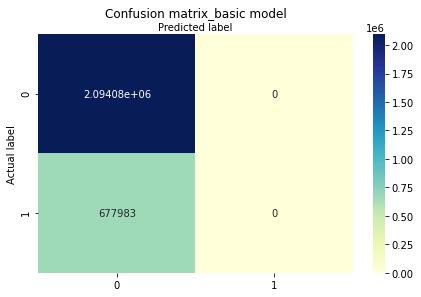

In [21]:
#Evaluate the model
print(classification_report(Y_test, pred_1))

import matplotlib.pyplot as plt
from sklearn import metrics
lr_matrix_1 = metrics.confusion_matrix(Y_test, pred_1)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_basic model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall:F1 score reaches its best value at 1 and worst score at 0.

The support is the number of occurence of the given class in your dataset 

In [ ]:
(Y_test.shape[0]-sum(Y_test))/sum(Y_test)

3.077476027764989

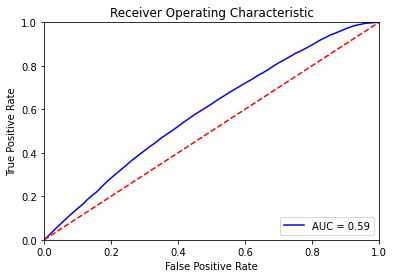

In [22]:
#AUC_ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr_1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**our model is 50% accurate for instances and their classification. The model has no discrimination capabilities at all in this case.**

##### basic model_try C, with L2 regularization

In [23]:
for i in [0.1, 1, 20,100,1000]:
    lr_2 = LogisticRegression(C=i,solver='lbfgs').fit(X_train,Y_train)
    print(i)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(lr_2.score(X_train,Y_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr_2.score(X_test,Y_test)))

0.1
Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.76
1
Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.76
20
Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.76
100
Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.76
1000
Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.76


In [24]:
pred_2=lr_2.predict(X_test)

**AUC_ROC**

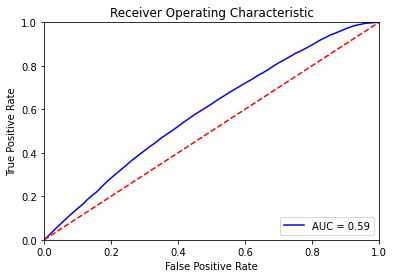

In [25]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

https://stackabuse.com/understanding-roc-curves-with-python/

#### rebalance weight

##### class_weight='balanced'

In [26]:
lr_3=LogisticRegression(solver='lbfgs',class_weight='balanced')

In [27]:
lr_3.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lr_3.score(X_train,Y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr_3.score(X_test,Y_test)))

Accuracy of Logistic regression classifier on training set: 0.52
Accuracy of Logistic regression classifier on test set: 0.52


In [29]:
pred_3=lr_3.predict(X_test)
pred_3

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
(Y_test.shape[0]-sum(Y_test))/sum(Y_test)

3.077476027764989

              precision    recall  f1-score   support

           0       0.81      0.49      0.61   2094085
           1       0.29      0.64      0.40    677983

    accuracy                           0.52   2772068
   macro avg       0.55      0.56      0.50   2772068
weighted avg       0.68      0.52      0.56   2772068



Text(0.5, 257.44, 'Predicted label')

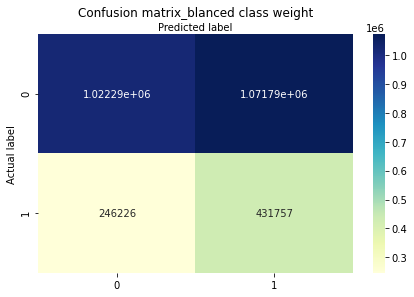

In [30]:
#Evaluate the model
print(classification_report(Y_test, pred_3))
from sklearn import metrics
lr_matrix_3 = metrics.confusion_matrix(Y_test, pred_3)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_blanced class weight', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


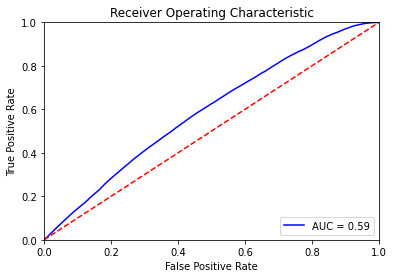

In [31]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr_3.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### add threshold

In [32]:
lr_4=LogisticRegression(solver='lbfgs').fit(X_train,Y_train)

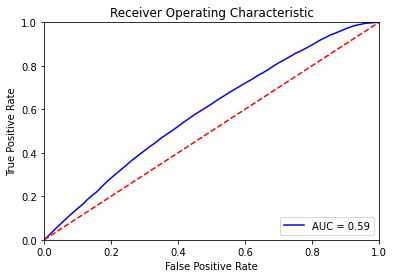

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
probs = lr_4.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
from numpy import sqrt
from numpy import argmax
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.254511, G-Mean=0.563


https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

              precision    recall  f1-score   support

           0       0.80      0.56      0.66   2094085
           1       0.29      0.57      0.39    677983

    accuracy                           0.56   2772068
   macro avg       0.55      0.56      0.52   2772068
weighted avg       0.68      0.56      0.59   2772068



Text(0.5, 257.44, 'Predicted label')

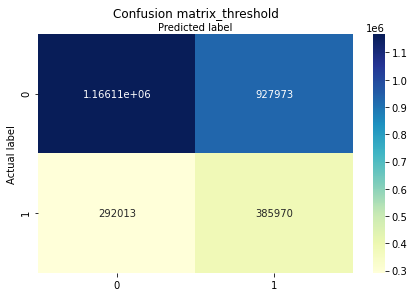

In [35]:
THRESHOLD = 0.254511
pred_4 = np.where(lr_4.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(Y_test, pred_4))
#Evaluate the model
from sklearn import metrics
lr_matrix_4 = metrics.confusion_matrix(Y_test, pred_4)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr_matrix_4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_threshold', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### balanced+threshold

In [36]:
lr_5=LogisticRegression(solver='lbfgs',class_weight='balanced')

In [37]:
lr_5.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

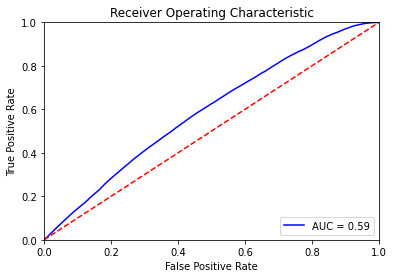

In [38]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
probs = lr_5.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
from numpy import sqrt
from numpy import argmax
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.509806, G-Mean=0.563


              precision    recall  f1-score   support

           0       0.80      0.55      0.65   2094085
           1       0.29      0.58      0.39    677983

    accuracy                           0.56   2772068
   macro avg       0.55      0.56      0.52   2772068
weighted avg       0.68      0.56      0.59   2772068



Text(0.5, 257.44, 'Predicted label')

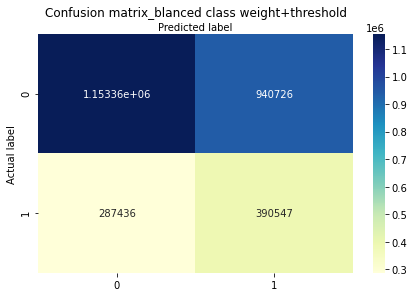

In [40]:
THRESHOLD = 0.509806
pred_5 = np.where(lr_5.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(Y_test, pred_5))
from sklearn import metrics
lr_matrix_5 = metrics.confusion_matrix(Y_test, pred_5)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr_matrix_5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix_blanced class weight+threshold', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

####Compare the results

In [41]:
print('1 Basic model')
print(classification_report(Y_test, pred_1))
print('2 basic model_try C, with L2 regularization')
print(classification_report(Y_test, pred_2))
print('3 imblance data_class weight')
print(classification_report(Y_test, pred_3))
print('4 add threshold')
print(classification_report(Y_test, pred_4))
print('5 blanced+threshold')
print(classification_report(Y_test, pred_5))

1 Basic model


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86   2094085
           1       0.00      0.00      0.00    677983

    accuracy                           0.76   2772068
   macro avg       0.38      0.50      0.43   2772068
weighted avg       0.57      0.76      0.65   2772068

2 basic model_try C, with L2 regularization
              precision    recall  f1-score   support

           0       0.76      1.00      0.86   2094085
           1       0.00      0.00      0.00    677983

    accuracy                           0.76   2772068
   macro avg       0.38      0.50      0.43   2772068
weighted avg       0.57      0.76      0.65   2772068

3 imblance data_class weight
              precision    recall  f1-score   support

           0       0.81      0.49      0.61   2094085
           1       0.29      0.64      0.40    677983

    accuracy                           0.52   2772068
   macro avg       0.55      0.56      0.50   2772068
w

#### model 2 Malignant_neoplasms

In [44]:
X1_train=train_df[['current_data_year','education_label','sex_label','race_recode_5','age_recode_12','marital_status_label']]
X1_test=test_df[['current_data_year','education_label','sex_label','race_recode_5','age_recode_12','marital_status_label']]
Y1_train=train_df['Malignant_neoplasms_label']
Y1_test=test_df['Malignant_neoplasms_label']

In [45]:
X1_train.head()

,current_data_year,education_label,sex_label,race_recode_5,age_recode_12,marital_status_label
18347342,2012,0,0,1,9,2
5377037,2007,1,1,1,10,4
15959796,2011,0,0,1,11,4
8925534,2008,1,1,1,11,1
20877112,2013,1,1,1,10,2


Malignant_neoplasms_label
0    19477045
1     5471560
dtype: int64
3.559687730738583
0.21931326420855995


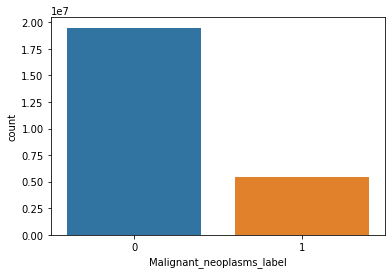

In [46]:
import seaborn as sns

print(train_df.groupby('Malignant_neoplasms_label').size())

sns.countplot(x='Malignant_neoplasms_label', data=train_df)
print((Y1_train.shape[0]-sum(Y1_train))/sum(Y1_train))
print(sum(Y1_train)/len(Y1_train))

##### basic model

In [47]:
lr1_1=LogisticRegression(penalty='none',solver='lbfgs').fit(X1_train,Y1_train)

In [48]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lr1_1.score(X1_train,Y1_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr1_1.score(X1_test,Y1_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


In [49]:
pred1_1=lr1_1.predict(X1_test)
sum(pred1_1)
#which means all predicted y will be 0

0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88   2163630
           1       0.00      0.00      0.00    608438

    accuracy                           0.78   2772068
   macro avg       0.39      0.50      0.44   2772068
weighted avg       0.61      0.78      0.68   2772068



Text(0.5, 257.44, 'Predicted label')

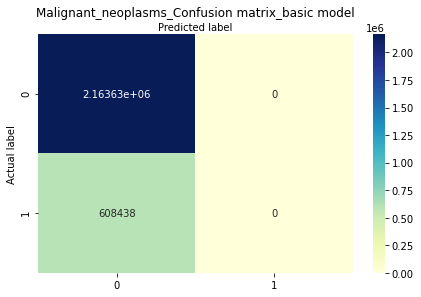

In [50]:
#Evaluate the model
print(classification_report(Y1_test, pred1_1))

import matplotlib.pyplot as plt
from sklearn import metrics
lr1_matrix_1 = metrics.confusion_matrix(Y1_test, pred1_1)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr1_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Malignant_neoplasms_Confusion matrix_basic model', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

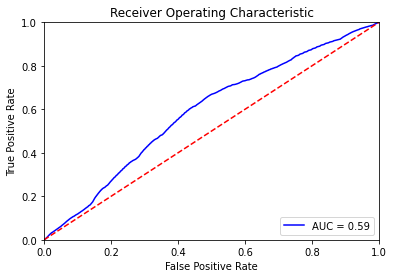

In [51]:
#AUC_ROC
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr1_1.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### basic model_try C, with L2 regularization

In [52]:
for i in [0.1, 1, 20,100,1000]:
    lr1_2 = LogisticRegression(C=i,solver='lbfgs').fit(X1_train,Y1_train)
    print(i)
    print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(lr1_2.score(X1_train,Y1_train)))
    print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr1_2.score(X1_test,Y1_test)))

0.1
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78
1
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78
20
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78
100
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78
1000
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


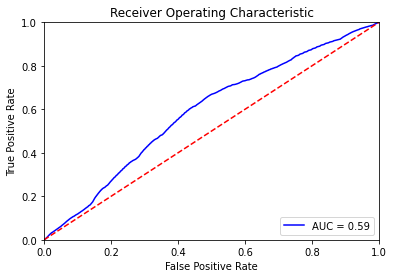

In [53]:
pred1_2=lr1_2.predict(X1_test)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr1_2.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### rebalance weight

##### class_weight='balanced'

In [54]:
lr1_3=LogisticRegression(solver='lbfgs',class_weight='balanced')

In [55]:
lr1_3.fit(X1_train,Y1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(lr1_3.score(X1_train,Y1_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(lr1_3.score(X1_test,Y1_test)))

Accuracy of Logistic regression classifier on training set: 0.52
Accuracy of Logistic regression classifier on test set: 0.52


              precision    recall  f1-score   support

           0       0.84      0.47      0.61   2163630
           1       0.27      0.69      0.39    608438

    accuracy                           0.52   2772068
   macro avg       0.56      0.58      0.50   2772068
weighted avg       0.72      0.52      0.56   2772068



Text(0.5, 257.44, 'Predicted label')

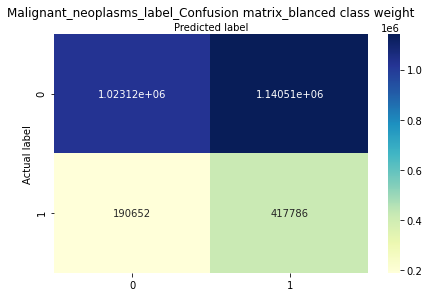

In [57]:
pred1_3=lr1_3.predict(X1_test)
#Evaluate the model
print(classification_report(Y1_test, pred1_3))
from sklearn import metrics
lr1_matrix_3 = metrics.confusion_matrix(Y1_test, pred1_3)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr1_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Malignant_neoplasms_label_Confusion matrix_blanced class weight', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


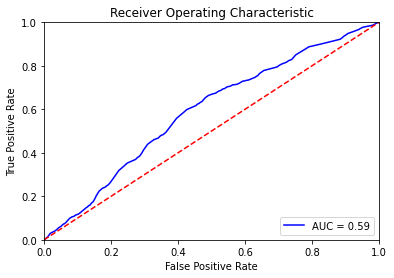

In [58]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr1_3.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### add threshold

In [59]:
lr1_4=LogisticRegression(solver='lbfgs').fit(X1_train,Y1_train)

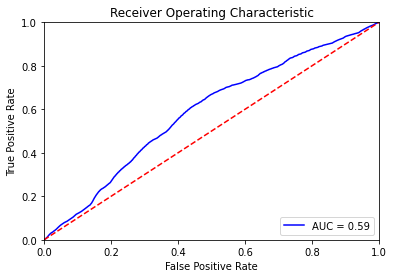

In [60]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
probs = lr1_4.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
from numpy import sqrt
from numpy import argmax
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.240516, G-Mean=0.585


              precision    recall  f1-score   support

           0       0.84      0.56      0.67   2163630
           1       0.28      0.61      0.38    608438

    accuracy                           0.57   2772068
   macro avg       0.56      0.58      0.53   2772068
weighted avg       0.71      0.57      0.61   2772068



Text(0.5, 257.44, 'Predicted label')

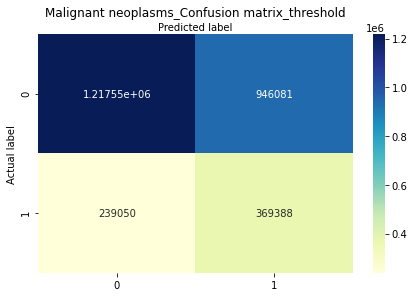

In [62]:
THRESHOLD = 0.240516
pred1_4 = np.where(lr1_4.predict_proba(X1_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(Y1_test, pred1_4))
#Evaluate the model
from sklearn import metrics
lr1_matrix_4 = metrics.confusion_matrix(Y1_test, pred1_4)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr1_matrix_4), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Malignant neoplasms_Confusion matrix_threshold', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### balanced+threshold

In [63]:
lr1_5=LogisticRegression(solver='lbfgs',class_weight='balanced')

In [64]:
lr1_5.fit(X1_train,Y1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

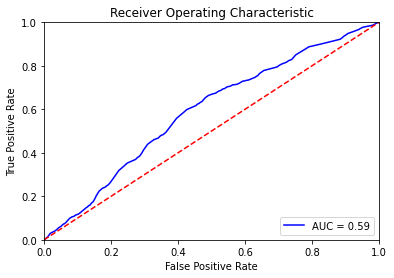

In [65]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
probs = lr1_5.predict_proba(X1_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y1_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from numpy import sqrt
from numpy import argmax
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.533298, G-Mean=0.586


              precision    recall  f1-score   support

           0       0.84      0.57      0.68   2163630
           1       0.28      0.60      0.38    608438

    accuracy                           0.58   2772068
   macro avg       0.56      0.59      0.53   2772068
weighted avg       0.71      0.58      0.62   2772068



Text(0.5, 257.44, 'Predicted label')

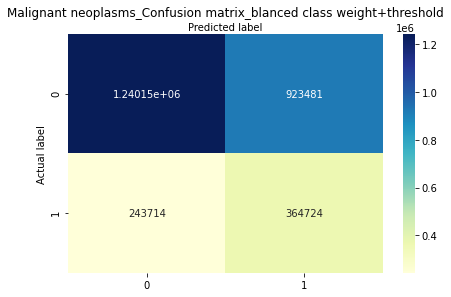

In [67]:
THRESHOLD = 0.533298
pred1_5 = np.where(lr1_5.predict_proba(X1_test)[:,1] > THRESHOLD, 1, 0)
print(classification_report(Y1_test, pred1_5))
from sklearn import metrics
lr1_matrix_5 = metrics.confusion_matrix(Y1_test, pred1_5)
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(lr1_matrix_5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Malignant neoplasms_Confusion matrix_blanced class weight+threshold', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

####Compare the results

In [68]:
print('1 Malignant neoplasms_Basic model')
print(classification_report(Y1_test, pred1_1))
print('2 Malignant neoplasms_basic model_try C, with L2 regularization')
print(classification_report(Y1_test, pred1_2))
print('3 Malignant neoplasms_imblance data_class weight')
print(classification_report(Y1_test, pred1_3))
print('4 Malignant neoplasms_add threshold')
print(classification_report(Y1_test, pred1_4))
print('5 Malignant neoplasms_blanced+threshold')
print(classification_report(Y1_test, pred1_5))

1 Malignant neoplasms_Basic model


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88   2163630
           1       0.00      0.00      0.00    608438

    accuracy                           0.78   2772068
   macro avg       0.39      0.50      0.44   2772068
weighted avg       0.61      0.78      0.68   2772068

2 Malignant neoplasms_basic model_try C, with L2 regularization
              precision    recall  f1-score   support

           0       0.78      1.00      0.88   2163630
           1       0.00      0.00      0.00    608438

    accuracy                           0.78   2772068
   macro avg       0.39      0.50      0.44   2772068
weighted avg       0.61      0.78      0.68   2772068

3 Malignant neoplasms_imblance data_class weight
              precision    recall  f1-score   support

           0       0.84      0.47      0.61   2163630
           1       0.27      0.69      0.39    608438

    accuracy                           0.52   2772068
   macro avg   

## model 2 add features

In [11]:
df=pd.read_csv('/content/drive/MyDrive/info final project/model/data/2005_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
key_data=list(df.columns)

In [14]:
for i in range(len(key_data)):
    if key_data[i]=='place_of_injury_for_causes_w00_y34_except_y06_and_y07_':
        print('place_of_injury_for_causes_w00_y34_except_y06_and_y07_:',i)
    if key_data[i]=='manner_of_death':
        print('manner_of_death:',i)
    if key_data[i]=='activity_code':
        print('activity_code:',i)
    if key_data[i]=='marital_status':
        print('marital_status',i)
        

marital_status 14
manner_of_death: 18
activity_code: 21
place_of_injury_for_causes_w00_y34_except_y06_and_y07_: 22


In [15]:
del df

In [ ]:
df_m2 = pd.read_csv("/content/drive/MyDrive/info final project/model/data/%d_data.csv" %i,usecols=[16,19,20])

In [14]:
df_m2=pd.read_csv('/content/drive/MyDrive/info final project/model/data/2005_data.csv',usecols=[18,21,22])

In [15]:
df_m2.reset_index(inplace=True)
df_m2=df_m2.rename(columns={'index':'sample_num'})
df_m2[:5]

,sample_num,manner_of_death,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_
0,0,7.0,NaN,NaN
1,1,7.0,NaN,NaN
2,2,7.0,NaN,NaN
3,3,7.0,NaN,NaN
4,4,7.0,NaN,NaN


In [34]:
(df_m2['manner_of_death'].value_counts())/sum(df_m2['manner_of_death'].value_counts())

7.0    0.893995
1.0    0.066264
2.0    0.019152
3.0    0.011186
5.0    0.005310
4.0    0.004093
Name: manner_of_death, dtype: float64

In [26]:
df_m2['manner_of_death'].unique()

array([ 7.,  5.,  2.,  1.,  3., nan,  4.])

In [28]:
(len(df_m2)-sum(df_m2['manner_of_death'].value_counts()))/len(df_m2) #nan

0.29883351967334637

In [19]:
df_m2['activity_code'].value_counts()

9.0    170409
2.0       210
0.0       111
1.0        39
4.0        15
8.0        12
3.0         8
Name: activity_code, dtype: int64

In [33]:
(len(df_m2)-sum(df_m2['activity_code'].value_counts()))/len(df_m2) #nan

0.9303553181929015

In [23]:
sum(df_m2['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'].value_counts())

152869

In [22]:
df_m2['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'].unique()

array([nan,  9.,  0.,  8.,  5.,  3.,  4.,  6.,  1.,  2.,  7.])

In [31]:
(len(df_m2)-sum(df_m2['place_of_injury_for_causes_w00_y34_except_y06_and_y07_'].value_counts()))/len(df_m2)
#nan

0.9376682462754423

In [ ]:
data['martial ']